In [5]:
import pandas as pd
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

 Plotting the pulse tests

In [6]:
# Directory path
input_path = "../data/outputs/"
output_path = "../outputs/plots/"

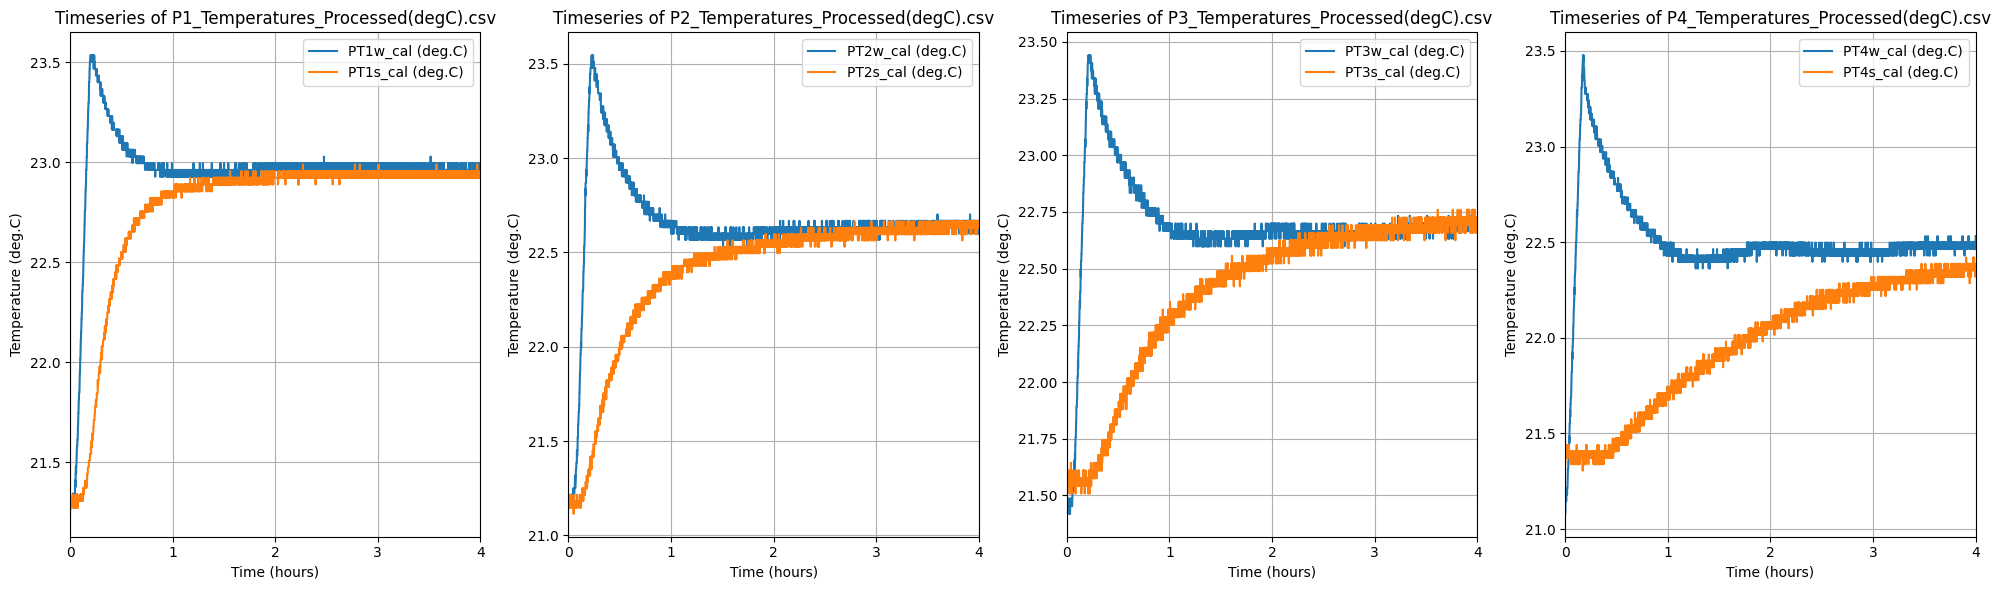

In [7]:
# List of file names of the pulse tests to plot
files_to_plot = [
    'P1_Temperatures_Processed(degC).csv',
    'P2_Temperatures_Processed(degC).csv',
    'P3_Temperatures_Processed(degC).csv',
    'P4_Temperatures_Processed(degC).csv'
]

# Read CSV files into dataframes
dataframes = {}
for file_name in files_to_plot:
    file_path = os.path.join(input_path, file_name)
    dataframes[file_name] = pd.read_csv(file_path)

# Creating a figure with the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(files_to_plot), figsize=(5 * len(files_to_plot), 6))

for idx, file_name in enumerate(files_to_plot):
    df = dataframes[file_name]
    
    # Extracting the column names
    time_column = df.columns[0]
    temperature_columns = df.columns[1:].tolist()  # Convert to a list
    
    # Converting time column to hours
    df['Time (hours)'] = df[time_column] / 3600
    
    # Removing "Time (hours)" from the plot
    if 'Time (hours)' in temperature_columns:
        temperature_columns.remove('Time (hours)')
    
    ax = axes[idx]  # Selecting the subplot
    
    for column in temperature_columns:
        ax.plot(df['Time (hours)'], df[column], label=column)
        
    ax.set_xlim(0, 4)  # Set x-axis limits from 0 to 4 hours
    ax.set_xticks([0, 1, 2, 3, 4])  # Set x-axis ticks
    ax.legend()
    ax.grid(True)
    ax.set_title(f'Timeseries of {file_name}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Temperature (deg.C)')

plt.tight_layout()
plt.show()